# Flights Delay Prediction Sample Project
## 1.Buisness Understanding

(Introducing the business value of this data)
（简要描述这一套数据的商业价值是什么？）
The data help both travalers and air plane to track the flights delay. Helping them to plan ahead and adjust approprietly basedon the delay information, preventing time cost and plan coruption.


### 1.1 The Data Set

The dataset come from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers. The retrieved dataset contains the domestic flight information, including delays and cancellations. There are XXXXXXXX observations and XX features, such as the time of flight, airline code, and arrival cities, etc. We have a combination of qualitative and quantitative features.

### 1.2 Measure Of Success

(简要介绍有什么样的评估办法来评价模型结果？)

## 2 Data Understanding
### 2.1 Data and python module loading¶
Loading the necessary python modules and the dataset

In [141]:
#import statements
import pandas as pd
import numpy as np
import re 

# 写Comments非常重要，如果不写，过一两周/月连你自己都会忘了很多算法细节
import warnings
warnings.filterwarnings(action="ignore")

from numpy import array
from numpy import argmax
from zipfile import ZipFile
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Download a calendar year of data from this [address](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time). 

The data downloaded are zip files with filename "XXXXXXXXX_T_ONTIME_REPORTING.csv" in each zip file, which each stands for a month. 

Place the data to the same directory as this file, or change the address under ZipFile(), such as "C:/Document/...csv"


In [2]:
%%time

# create an empty data frame to store all the data to be analyzed
df = pd.DataFrame()

# concatenate the data from Jan to Dec in 2019
for i in range(1,13):

    # open zipfiles that titled "2019.." and use index "i" to roll through "01" to "12"
    with ZipFile("2019{}.zip".format(str(i).zfill(2))) as zf: 
    
        # open the file zipped within each zipfile (Note: all zipped filenames are the same)
        with zf.open("657160870_T_ONTIME_REPORTING.csv") as f: 
            
            # load each month to a temperary variable and print its size
            temp = pd.read_csv(f)
            print("Month", i, "has", temp.shape[0], "counts of records")
            
            # attach each month to the empty data frame
            df = pd.concat([df, temp])

# return the total size of the dataframe loaded
print(df.shape)
            
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('^display.', silent=True)

# return the first 10 rows of the table
df.head(10)

Month 1 has 583985 counts of records
Month 2 has 533175 counts of records
Month 3 has 632074 counts of records
Month 4 has 612023 counts of records
Month 5 has 636390 counts of records
Month 6 has 636691 counts of records
Month 7 has 659029 counts of records
Month 8 has 658461 counts of records
Month 9 has 605979 counts of records
Month 10 has 636014 counts of records
Month 11 has 602453 counts of records
Month 12 has 625763 counts of records
(7422037, 47)
CPU times: user 38.4 s, sys: 18.8 s, total: 57.2 s
Wall time: 59.3 s


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2019        1      1            16            3  2019-01-16   
1  2019        1      1            17            4  2019-01-17   
2  2019        1      1            18            5  2019-01-18   
3  2019        1      1            19            6  2019-01-19   
4  2019        1      1            20            7  2019-01-20   
5  2019        1      1            21            1  2019-01-21   
6  2019        1      1            22            2  2019-01-22   
7  2019        1      1            23            3  2019-01-23   
8  2019        1      1            24            4  2019-01-24   
9  2019        1      1            25            5  2019-01-25   

  OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN  ... AIR_TIME FLIGHTS  \
0                AA   N150UW                544    BOS  ...     61.0     1.0   
1                AA   N563UW                544    BOS  ...     66.0     1.0   
2                AA   N921US                544    BOS  ...     66.0     1.0   
3                AA   N604AW                544    BOS  ...     64.0     1.0   
4                AA   N975UY                544    BOS  ...      NaN     1.0   
5                AA   N977UY                544    BOS  ...      NaN     1.0   
6                AA   N913US                544    BOS  ...      NaN     1.0   
7                AA   N546UW                544    BOS  ...     81.0     1.0   
8                AA   N973UY                544    BOS  ...     81.0     1.0   
9                AA   N582UW                544    BOS  ...     72.0     1.0   

  DISTANCE DISTANCE_GROUP CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
0    280.0              2           NaN            NaN        NaN   
1    280.0              2           NaN            NaN        NaN   
2    280.0              2           NaN            NaN        NaN   
3    280.0              2           NaN            NaN        NaN   
4    280.0              2           NaN            NaN        NaN   
5    280.0              2           NaN            NaN        NaN   
6    280.0              2           NaN            NaN        NaN   
7    280.0              2           NaN            NaN        NaN   
8    280.0              2           NaN            NaN        NaN   
9    280.0              2           NaN            NaN        NaN   

   SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 46  
0             NaN                  NaN          NaN  
1             NaN                  NaN          NaN  
2             NaN                  NaN          NaN  
3             NaN                  NaN          NaN  
4             NaN                  NaN          NaN  
5             NaN                  NaN          NaN  
6             NaN                  NaN          NaN  
7             NaN                  NaN          NaN  
8             NaN                  NaN          NaN  
9             NaN                  NaN          NaN  

[10 rows x 47 columns]

We are only interested in incoming flights to Dallas/Fort Worth International Airport (DFW) airport, we subset the data where DEST_CITY_NAME is Dallas/Fort Worth, OR DEST is DFW.

In [3]:
# Subset flights as instructed above and name the table df_dfw
df_dfw = df[df['DEST'] == 'DFW']
df_dfw

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
304     2019        1      1             1            2  2019-01-01   
305     2019        1      1             2            3  2019-01-02   
306     2019        1      1             3            4  2019-01-03   
307     2019        1      1             4            5  2019-01-04   
308     2019        1      1             5            6  2019-01-05   
...      ...      ...    ...           ...          ...         ...   
622700  2019        4     12            18            3  2019-12-18   
623061  2019        4     12            18            3  2019-12-18   
623517  2019        4     12            19            4  2019-12-19   
623892  2019        4     12            19            4  2019-12-19   
625021  2019        4     12            30            1  2019-12-30   

       OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN  ... AIR_TIME  \
304                   AA   N927UW                553    CLT  ...    147.0   
305                   AA   N137AA                553    CLT  ...    159.0   
306                   AA   N193UW                553    CLT  ...    157.0   
307                   AA   N586UW                553    CLT  ...    133.0   
308                   AA   N181UW                553    CLT  ...    128.0   
...                  ...      ...                ...    ...  ...      ...   
622700                B6   N655JB                215    BOS  ...    220.0   
623061                B6   N571JB               1115    BOS  ...    216.0   
623517                B6   N809JB                215    BOS  ...    210.0   
623892                B6   N607JB               1115    BOS  ...    218.0   
625021                B6   N561JB               1115    BOS  ...    234.0   

       FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY  WEATHER_DELAY  \
304        1.0    936.0              4           NaN            NaN   
305        1.0    936.0              4           NaN            NaN   
306        1.0    936.0              4           3.0            0.0   
307        1.0    936.0              4           NaN            NaN   
308        1.0    936.0              4           NaN            NaN   
...        ...      ...            ...           ...            ...   
622700     1.0   1562.0              7           NaN            NaN   
623061     1.0   1562.0              7           NaN            NaN   
623517     1.0   1562.0              7           NaN            NaN   
623892     1.0   1562.0              7           NaN            NaN   
625021     1.0   1562.0              7           NaN            NaN   

        NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 46  
304           NaN             NaN                  NaN          NaN  
305           NaN             NaN                  NaN          NaN  
306           9.0             0.0                 22.0          NaN  
307           NaN             NaN                  NaN          NaN  
308           NaN             NaN                  NaN          NaN  
...           ...             ...                  ...          ...  
622700        NaN             NaN                  NaN          NaN  
623061        NaN             NaN                  NaN          NaN  
623517        NaN             NaN                  NaN          NaN  
623892        NaN             NaN                  NaN          NaN  
625021        NaN             NaN                  NaN          NaN  

[304346 rows x 47 columns]

In [4]:
# Calculate the number of flights scheduled
scheduled = df_dfw.shape[0]
scheduled

# Calculate the number of flights cancelled
cancelled = df_dfw[df_dfw['CANCELLED'] == 1].count()[0]

# Calculate the number of flights operated
operated = scheduled - cancelled

# Calculate the number of flights diverted
diverted = df_dfw[df_dfw['DIVERTED'] == 1].count()[0]

# Calculate the percentage of flights operated
per_operated = operated / scheduled

# Calculate the percentage of flights cancelled
per_cancelled = cancelled / scheduled

# Calculate the percentage of operated flights diverted
per_diverted = diverted / operated

# Print the above information
print('Scheduled flights: ', scheduled)
print('Cancelled flights: ', cancelled)
print('Operated flights: ', operated)
print('Diverted flights: ', diverted)
print('Operated Percentage: ', round(per_operated*100, 2), '%')
print('Cancelled Percentage: ', round(per_cancelled*100, 2), '%')
print('diverted Percentage: ', round(per_diverted*100, 2), '%')

Scheduled flights:  304346
Cancelled flights:  8276
Operated flights:  296070
Diverted flights:  1272
Operated Percentage:  97.28 %
Cancelled Percentage:  2.72 %
diverted Percentage:  0.43 %


### 2.2 Data Cleaning
#### Check out the data information

In [5]:
# Use .info() function to get the general info for the dataset
df_dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304346 entries, 304 to 625021
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 304346 non-null  int64  
 1   QUARTER              304346 non-null  int64  
 2   MONTH                304346 non-null  int64  
 3   DAY_OF_MONTH         304346 non-null  int64  
 4   DAY_OF_WEEK          304346 non-null  int64  
 5   FL_DATE              304346 non-null  object 
 6   OP_UNIQUE_CARRIER    304346 non-null  object 
 7   TAIL_NUM             303876 non-null  object 
 8   OP_CARRIER_FL_NUM    304346 non-null  int64  
 9   ORIGIN               304346 non-null  object 
 10  ORIGIN_CITY_NAME     304346 non-null  object 
 11  ORIGIN_STATE_ABR     304346 non-null  object 
 12  DEST                 304346 non-null  object 
 13  DEST_CITY_NAME       304346 non-null  object 
 14  DEST_STATE_ABR       304346 non-null  object 
 15  CRS_DEP_TIME   

#### There is one date data. Make it date format.

In [6]:
# Convert flight date to a date variable
df_dfw['FL_DATE'] = pd.to_datetime(df_dfw['FL_DATE'])
df_dfw['FL_DATE']

304      2019-01-01
305      2019-01-02
306      2019-01-03
307      2019-01-04
308      2019-01-05
            ...    
622700   2019-12-18
623061   2019-12-18
623517   2019-12-19
623892   2019-12-19
625021   2019-12-30
Name: FL_DATE, Length: 304346, dtype: datetime64[ns]

#### Check out the data size

In [7]:
# Use .shape() funciton to get the shape of the data
df_dfw.shape

(304346, 47)

#### Check out the missing values

In [8]:
# Use .isnull() and .sum() functions to print the number of null values in each variable
df_dfw.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
OP_UNIQUE_CARRIER           0
TAIL_NUM                  470
OP_CARRIER_FL_NUM           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR            0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR              0
CRS_DEP_TIME                0
DEP_TIME                 8039
DEP_DELAY                8039
DEP_DELAY_NEW            8039
DEP_DEL15                8039
DEP_DELAY_GROUP          8039
DEP_TIME_BLK                0
TAXI_OUT                 8249
WHEELS_OFF               8249
WHEELS_ON                8327
TAXI_IN                  8327
CRS_ARR_TIME                0
ARR_TIME                 8327
ARR_DELAY                9548
ARR_DELAY_NEW            9548
ARR_DEL15                9548
ARR_DELAY_GROUP          9548
ARR_TIME_BLK                0
CANCELLED 

##### Are all columns useful? How about those variables such as TAIL_NUM and Unnamed?

In [9]:
# Drop the columns with null values and doesn't have to do with predictions such as Unnamed
df_dfw = df_dfw.drop(columns = ['TAIL_NUM', 'Unnamed: 46'])

# Use .isnull() and .sum() functions to print the number of null values in each variable
df_dfw.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
OP_UNIQUE_CARRIER           0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR            0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR              0
CRS_DEP_TIME                0
DEP_TIME                 8039
DEP_DELAY                8039
DEP_DELAY_NEW            8039
DEP_DEL15                8039
DEP_DELAY_GROUP          8039
DEP_TIME_BLK                0
TAXI_OUT                 8249
WHEELS_OFF               8249
WHEELS_ON                8327
TAXI_IN                  8327
CRS_ARR_TIME                0
ARR_TIME                 8327
ARR_DELAY                9548
ARR_DELAY_NEW            9548
ARR_DEL15                9548
ARR_DELAY_GROUP          9548
ARR_TIME_BLK                0
CANCELLED                   0
DIVERTED  

##### Are missing values related to cancellation?

In [10]:
# Use .unique() funciton to check unique values of column "Cancelled"
df_dfw['CANCELLED'].unique()

array([0., 1.])

In [11]:
# Filter the data to cancelled flights and name the new table df_dfw_cancelled
df_dfw_cancelled = df_dfw[df_dfw['CANCELLED'] == 1]
df_dfw_cancelled

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK    FL_DATE  \
2486    2019        1      1            30            3 2019-01-30   
2487    2019        1      1            31            4 2019-01-31   
4170    2019        1      1            15            2 2019-01-15   
4546    2019        1      1             3            4 2019-01-03   
6790    2019        1      1             2            3 2019-01-02   
...      ...      ...    ...           ...          ...        ...   
569982  2019        4     12            28            6 2019-12-28   
570093  2019        4     12            28            6 2019-12-28   
572338  2019        4     12            29            7 2019-12-29   
611183  2019        4     12             1            7 2019-12-01   
611621  2019        4     12             2            1 2019-12-02   

       OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM ORIGIN         ORIGIN_CITY_NAME  \
2486                  AA               1625    ORD              Chicago, IL   
2487                  AA               1625    ORD              Chicago, IL   
4170                  AA               1475    RSW           Fort Myers, FL   
4546                  AA               1492    CMH             Columbus, OH   
6790                  AA               1597    LGA             New York, NY   
...                  ...                ...    ...                      ...   
569982                OO               3143    ASE                Aspen, CO   
570093                OO               3231    ASE                Aspen, CO   
572338                OO               3140    MHK  Manhattan/Ft. Riley, KS   
611183                OO               5573    SFO        San Francisco, CA   
611621                OO               2966    FLG            Flagstaff, AZ   

        ... ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE  DISTANCE_GROUP  \
2486    ...                 NaN      NaN     1.0    801.0               4   
2487    ...                 NaN      NaN     1.0    801.0               4   
4170    ...                 NaN      NaN     1.0   1017.0               5   
4546    ...                 NaN      NaN     1.0    926.0               4   
6790    ...                 NaN      NaN     1.0   1389.0               6   
...     ...                 ...      ...     ...      ...             ...   
569982  ...                 NaN      NaN     1.0    701.0               3   
570093  ...                 NaN      NaN     1.0    701.0               3   
572338  ...                 NaN      NaN     1.0    431.0               2   
611183  ...                 NaN      NaN     1.0   1464.0               6   
611621  ...                 NaN      NaN     1.0    853.0               4   

        CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
2486              NaN            NaN        NaN             NaN   
2487              NaN            NaN        NaN             NaN   
4170              NaN            NaN        NaN             NaN   
4546              NaN            NaN        NaN             NaN   
6790              NaN            NaN        NaN             NaN   
...               ...            ...        ...             ...   
569982            NaN            NaN        NaN             NaN   
570093            NaN            NaN        NaN             NaN   
572338            NaN            NaN        NaN             NaN   
611183            NaN            NaN        NaN             NaN   
611621            NaN            NaN        NaN             NaN   

        LATE_AIRCRAFT_DELAY  
2486                    NaN  
2487                    NaN  
4170                    NaN  
4546                    NaN  
6790                    NaN  
...                     ...  
569982                  NaN  
570093                  NaN  
572338                  NaN  
611183                  NaN  
611621                  NaN  

[8276 rows x 45 columns]

In [12]:
# Use .info() function to get the general info for the dataset
df_dfw_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 2486 to 611621
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 8276 non-null   int64         
 1   QUARTER              8276 non-null   int64         
 2   MONTH                8276 non-null   int64         
 3   DAY_OF_MONTH         8276 non-null   int64         
 4   DAY_OF_WEEK          8276 non-null   int64         
 5   FL_DATE              8276 non-null   datetime64[ns]
 6   OP_UNIQUE_CARRIER    8276 non-null   object        
 7   OP_CARRIER_FL_NUM    8276 non-null   int64         
 8   ORIGIN               8276 non-null   object        
 9   ORIGIN_CITY_NAME     8276 non-null   object        
 10  ORIGIN_STATE_ABR     8276 non-null   object        
 11  DEST                 8276 non-null   object        
 12  DEST_CITY_NAME       8276 non-null   object        
 13  DEST_STATE_ABR       8276 no

In [13]:
# Use .isnull() and .sum() functions to print the number of null values in each variable
df_dfw_cancelled.isnull().sum()

YEAR                      0
QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
OP_UNIQUE_CARRIER         0
OP_CARRIER_FL_NUM         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_STATE_ABR          0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_ABR            0
CRS_DEP_TIME              0
DEP_TIME               8039
DEP_DELAY              8039
DEP_DELAY_NEW          8039
DEP_DEL15              8039
DEP_DELAY_GROUP        8039
DEP_TIME_BLK              0
TAXI_OUT               8249
WHEELS_OFF             8249
WHEELS_ON              8276
TAXI_IN                8276
CRS_ARR_TIME              0
ARR_TIME               8276
ARR_DELAY              8276
ARR_DELAY_NEW          8276
ARR_DEL15              8276
ARR_DELAY_GROUP        8276
ARR_TIME_BLK              0
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME 

##### What are some relationships between the df_dfw_cancelled flights and df_dfw?

In [14]:
# Drop the cancelled flights from df_dfw OR fliter the uncancelled flights for df_dfw
df_dfw = df_dfw[df_dfw['CANCELLED'] == 0]

In [15]:
# Use .isnull() and .sum() functions to print the number of null values in each variable
df_dfw.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
OP_UNIQUE_CARRIER           0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR            0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR              0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
DEP_DELAY_GROUP             0
DEP_TIME_BLK                0
TAXI_OUT                    0
WHEELS_OFF                  0
WHEELS_ON                  51
TAXI_IN                    51
CRS_ARR_TIME                0
ARR_TIME                   51
ARR_DELAY                1272
ARR_DELAY_NEW            1272
ARR_DEL15                1272
ARR_DELAY_GROUP          1272
ARR_TIME_BLK                0
CANCELLED                   0
DIVERTED  

##### Are missing values related to divertion?

In [16]:
# Use .unique() funciton to check unique values of column "Cancelled"
df_dfw['DIVERTED'].unique()
df_dfw['CANCELLED'].unique()

array([0.])

In [17]:
# Filter the data to diverted flights and name the new table df_dfw_diverted
df_dfw_diverted = df_dfw[df_dfw['DIVERTED'] == 1]
df_dfw_diverted

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK    FL_DATE  \
2074    2019        1      1             3            4 2019-01-03   
3031    2019        1      1            13            7 2019-01-13   
210367  2019        1      1            17            4 2019-01-17   
265706  2019        1      1             2            3 2019-01-02   
265707  2019        1      1             2            3 2019-01-02   
...      ...      ...    ...           ...          ...        ...   
564265  2019        4     12            22            7 2019-12-22   
564357  2019        4     12            22            7 2019-12-22   
564432  2019        4     12            22            7 2019-12-22   
564543  2019        4     12            22            7 2019-12-22   
575131  2019        4     12            28            6 2019-12-28   

       OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME  ...  \
2074                  AA               1612    GSP        Greer, SC  ...   
3031                  AA               1644    SEA      Seattle, WA  ...   
210367                AA               2061    STL    St. Louis, MO  ...   
265706                YX               3417    EWR       Newark, NJ  ...   
265707                YX               3512    EWR       Newark, NJ  ...   
...                  ...                ...    ...              ...  ...   
564265                OO               3029    YUM         Yuma, AZ  ...   
564357                OO               3124    SGU   St. George, UT  ...   
564432                OO               3186    BHM   Birmingham, AL  ...   
564543                OO               3281    FWA   Fort Wayne, IN  ...   
575131                DL               3047    LAX  Los Angeles, CA  ...   

       ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE  DISTANCE_GROUP  \
2074                   NaN      NaN     1.0    862.0               4   
3031                   NaN      NaN     1.0   1660.0               7   
210367                 NaN      NaN     1.0    550.0               3   
265706                 NaN      NaN     1.0   1372.0               6   
265707                 NaN      NaN     1.0   1372.0               6   
...                    ...      ...     ...      ...             ...   
564265                 NaN      NaN     1.0   1022.0               5   
564357                 NaN      NaN     1.0    976.0               4   
564432                 NaN      NaN     1.0    597.0               3   
564543                 NaN      NaN     1.0    859.0               4   
575131                 NaN      NaN     1.0   1235.0               5   

        CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
2074              NaN            NaN        NaN             NaN   
3031              NaN            NaN        NaN             NaN   
210367            NaN            NaN        NaN             NaN   
265706            NaN            NaN        NaN             NaN   
265707            NaN            NaN        NaN             NaN   
...               ...            ...        ...             ...   
564265            NaN            NaN        NaN             NaN   
564357            NaN            NaN        NaN             NaN   
564432            NaN            NaN        NaN             NaN   
564543            NaN            NaN        NaN             NaN   
575131            NaN            NaN        NaN             NaN   

        LATE_AIRCRAFT_DELAY  
2074                    NaN  
3031                    NaN  
210367                  NaN  
265706                  NaN  
265707                  NaN  
...                     ...  
564265                  NaN  
564357                  NaN  
564432                  NaN  
564543                  NaN  
575131                  NaN  

[1272 rows x 45 columns]

In [18]:
# Use .info() function to get the general info for the dataset
df_dfw_diverted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 2074 to 575131
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 1272 non-null   int64         
 1   QUARTER              1272 non-null   int64         
 2   MONTH                1272 non-null   int64         
 3   DAY_OF_MONTH         1272 non-null   int64         
 4   DAY_OF_WEEK          1272 non-null   int64         
 5   FL_DATE              1272 non-null   datetime64[ns]
 6   OP_UNIQUE_CARRIER    1272 non-null   object        
 7   OP_CARRIER_FL_NUM    1272 non-null   int64         
 8   ORIGIN               1272 non-null   object        
 9   ORIGIN_CITY_NAME     1272 non-null   object        
 10  ORIGIN_STATE_ABR     1272 non-null   object        
 11  DEST                 1272 non-null   object        
 12  DEST_CITY_NAME       1272 non-null   object        
 13  DEST_STATE_ABR       1272 no

##### What are some relationships between the df_dfw_diverted flights and df_dfw?

In [19]:
# Drop the diverted flights from df_dfw OR fliter the uncancelled flights for df_dfw
df_dfw = df_dfw[df_dfw['DIVERTED'] == 0]

In [20]:
# Use .isnull() and .sum() functions to print the number of null values in each variable
df_dfw.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
OP_UNIQUE_CARRIER           0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR            0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR              0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
DEP_DELAY_GROUP             0
DEP_TIME_BLK                0
TAXI_OUT                    0
WHEELS_OFF                  0
WHEELS_ON                   0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
ARR_DELAY_NEW               0
ARR_DEL15                   0
ARR_DELAY_GROUP             0
ARR_TIME_BLK                0
CANCELLED                   0
DIVERTED  

##### Are missing values related to ARR_DELAY or ARR_DEL15 or any in regards?

In [21]:
# Use .unique() funciton to check unique values of column "Cancelled"
# Q: why to check 'Cancelled'
df_dfw['CANCELLED'].unique()

array([0.])

In [22]:
# Use .equals() to compare if non-delayed records the same as the rest with missing values 
df_dfw[df_dfw['ARR_DEL15']==0].equals(df_dfw[df_dfw['CARRIER_DELAY'].isnull()])

True

In [23]:
# Filter missing values with 0
df_dfw.fillna(0, inplace = True)

### 2.3 Data Quality Verification

#### Change hour-minute data to hourly data for CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME, and ARR_TIME. Then save them as int.

In [24]:
df_dfw.CRS_DEP_TIME = df_dfw.CRS_DEP_TIME//100

df_dfw.DEP_TIME = df_dfw.DEP_TIME//100
df_dfw.DEP_TIME = df_dfw.DEP_TIME.astype(np.int64)

df_dfw.CRS_ARR_TIME = df_dfw.CRS_ARR_TIME//100

df_dfw.ARR_TIME = df_dfw.ARR_TIME//100
df_dfw.ARR_TIME = df_dfw.ARR_TIME.astype(np.int64)

#### How does the desired data look now?

In [25]:
# Use .info() function to get the general info for the dataset
df_dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294798 entries, 304 to 625021
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   YEAR                 294798 non-null  int64         
 1   QUARTER              294798 non-null  int64         
 2   MONTH                294798 non-null  int64         
 3   DAY_OF_MONTH         294798 non-null  int64         
 4   DAY_OF_WEEK          294798 non-null  int64         
 5   FL_DATE              294798 non-null  datetime64[ns]
 6   OP_UNIQUE_CARRIER    294798 non-null  object        
 7   OP_CARRIER_FL_NUM    294798 non-null  int64         
 8   ORIGIN               294798 non-null  object        
 9   ORIGIN_CITY_NAME     294798 non-null  object        
 10  ORIGIN_STATE_ABR     294798 non-null  object        
 11  DEST                 294798 non-null  object        
 12  DEST_CITY_NAME       294798 non-null  object        
 13  DEST_STATE_A

#### Let's explore some basic statistics by variables such as carriers

* WN - Southwest Airlines
* AA - American Airlines
* YV - Mesa Airlines
* OO - SkyWest Airlines
* DL - Delta Air Lines
* UA - United Airlines
* AS - Alaska Airlines
* F9 - Frontier Airlines
* B6 - JetBlue Airways
* NK - Spirit Airlines
* HA - Hawaiian Airlines

In [26]:
# Use .describe() to show basic statistics on each airline operating at DFW
df_dfw['OP_UNIQUE_CARRIER'].unique()

array(['AA', 'MQ', 'B6', 'NK', 'DL', 'OO', 'AS', 'YV', 'F9', 'UA', 'EV',
       'YX', '9E', 'OH'], dtype=object)

In [27]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='AA'].describe()['ARR_DELAY']

count    149301.000000
mean          8.170233
std          62.441296
min         -75.000000
25%         -14.000000
50%          -5.000000
75%           9.000000
max        1910.000000
Name: ARR_DELAY, dtype: float64

In [28]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='MQ'].describe()['ARR_DELAY']

count    57162.000000
mean         5.106119
std         54.827095
min        -66.000000
25%        -15.000000
50%         -7.000000
75%          7.000000
max       1768.000000
Name: ARR_DELAY, dtype: float64

In [29]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='B6'].describe()['ARR_DELAY']

count    627.000000
mean       3.676236
std       50.810197
min      -53.000000
25%      -23.000000
50%       -9.000000
75%       11.500000
max      493.000000
Name: ARR_DELAY, dtype: float64

In [30]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='NK'].describe()['ARR_DELAY']

count    8583.000000
mean        6.831993
std        51.881783
min       -58.000000
25%       -16.000000
50%        -7.000000
75%         9.000000
max      1013.000000
Name: ARR_DELAY, dtype: float64

In [31]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='DL'].describe()['ARR_DELAY']

count    10140.000000
mean        11.684517
std         67.212533
min        -68.000000
25%        -14.000000
50%         -5.000000
75%         12.000000
max       1091.000000
Name: ARR_DELAY, dtype: float64

In [32]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='OO'].describe()['ARR_DELAY']

count    17485.000000
mean        10.281270
std         73.782404
min        -62.000000
25%        -17.000000
50%         -7.000000
75%          9.000000
max       1631.000000
Name: ARR_DELAY, dtype: float64

In [33]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='AS'].describe()['ARR_DELAY']

count    1474.000000
mean        0.280868
std        32.860169
min       -48.000000
25%       -15.000000
50%        -6.000000
75%         6.000000
max       365.000000
Name: ARR_DELAY, dtype: float64

In [34]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='YV'].describe()['ARR_DELAY']

count    39570.000000
mean        11.951403
std         68.319356
min        -61.000000
25%        -14.000000
50%         -6.000000
75%         10.000000
max       2034.000000
Name: ARR_DELAY, dtype: float64

In [35]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='F9'].describe()['ARR_DELAY']

count    1042.000000
mean       13.721689
std        49.163232
min       -47.000000
25%       -16.000000
50%        -2.500000
75%        24.750000
max       329.000000
Name: ARR_DELAY, dtype: float64

In [36]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='UA'].describe()['ARR_DELAY']

count    5931.000000
mean       11.901028
std        57.087184
min       -49.000000
25%       -15.000000
50%        -5.000000
75%        16.000000
max      1015.000000
Name: ARR_DELAY, dtype: float64

In [37]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='EV'].describe()['ARR_DELAY']

count    106.000000
mean      21.613208
std       48.596408
min      -42.000000
25%       -8.000000
50%        1.500000
75%       36.500000
max      259.000000
Name: ARR_DELAY, dtype: float64

In [38]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='YX'].describe()['ARR_DELAY']

count    1253.000000
mean        8.137271
std        60.755299
min       -59.000000
25%       -17.000000
50%        -5.000000
75%        13.000000
max      1038.000000
Name: ARR_DELAY, dtype: float64

In [39]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='9E'].describe()['ARR_DELAY']

count    1855.000000
mean        0.900270
std        56.195618
min       -71.000000
25%       -25.500000
50%       -13.000000
75%         6.000000
max       943.000000
Name: ARR_DELAY, dtype: float64

In [40]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='OH'].describe()['ARR_DELAY']

count    269.000000
mean       9.044610
std       28.192268
min      -30.000000
25%       -7.000000
50%        1.000000
75%       15.000000
max      171.000000
Name: ARR_DELAY, dtype: float64

#### How about median?

In [41]:
# Use .median() function to get median of ARR_DELAY for each carrier
#'AA', 'MQ', 'B6', 'NK', 'DL', 'OO', 'AS', 'YV', 'F9', 'UA', 'EV','YX', '9E', 'OH'
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='AA'].ARR_DELAY.median()

-5.0

In [42]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='MQ'].ARR_DELAY.median()

-7.0

In [43]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='B6'].ARR_DELAY.median()

-9.0

In [44]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='NK'].ARR_DELAY.median()

-7.0

In [45]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='DL'].ARR_DELAY.median()

-5.0

In [46]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='OO'].ARR_DELAY.median()

-7.0

In [47]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='AS'].ARR_DELAY.median()

-6.0

In [48]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='YV'].ARR_DELAY.median()

-6.0

In [49]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='F9'].ARR_DELAY.median()

-2.5

In [50]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='UA'].ARR_DELAY.median()

-5.0

In [51]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='EV'].ARR_DELAY.median()

1.5

In [52]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='YX'].ARR_DELAY.median()

-5.0

In [53]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='9E'].ARR_DELAY.median()

-13.0

In [54]:
df_dfw[df_dfw['OP_UNIQUE_CARRIER']=='OH'].ARR_DELAY.median()

1.0

In [55]:
# Use .describe() to show basic statistics on each airport connected to DFW
df_dfw.ORIGIN.value_counts()[:10]

ORD    7390
LAX    7174
ATL    6731
LGA    6361
IAH    5937
DEN    5739
LAS    4971
PHX    4523
SFO    4473
MCO    4325
Name: ORIGIN, dtype: int64

In [56]:
df_dfw[df_dfw['ORIGIN']=='ORD'].describe()[['ARR_DELAY','DEP_DELAY']]

ARR_DELAY    DEP_DELAY
count  7390.000000  7390.000000
mean     14.872801    17.769283
std      57.298638    52.885129
min     -52.000000   -19.000000
25%     -14.000000    -4.000000
50%      -2.000000    -1.000000
75%      19.000000    14.000000
max     854.000000   841.000000

In [57]:
df_dfw[df_dfw['ORIGIN']=='LAX'].describe()[['ARR_DELAY','DEP_DELAY']]

ARR_DELAY    DEP_DELAY
count  7174.000000  7174.000000
mean      5.889183    13.546975
std      48.644453    46.562493
min     -44.000000   -14.000000
25%     -14.000000    -3.000000
50%      -6.000000     0.000000
75%       8.000000    10.000000
max     889.000000   888.000000

In [58]:
df_dfw[df_dfw['ORIGIN']=='ATL'].describe()[['ARR_DELAY','DEP_DELAY']]

ARR_DELAY    DEP_DELAY
count  6731.000000  6731.000000
mean      6.922448    10.872382
std      48.386623    44.303551
min     -43.000000   -18.000000
25%     -13.000000    -4.000000
50%      -5.000000    -1.000000
75%       8.000000     6.000000
max    1434.000000  1435.000000

In [59]:
df_dfw[df_dfw['ORIGIN']=='LGA'].describe()[['ARR_DELAY','DEP_DELAY']]

ARR_DELAY    DEP_DELAY
count  6361.000000  6361.000000
mean      9.120736    15.893099
std      69.266734    64.882159
min     -69.000000   -20.000000
25%     -21.000000    -5.000000
50%      -7.000000    -2.000000
75%      15.000000     8.000000
max    1577.000000  1556.000000

In [60]:
df_dfw[df_dfw['ORIGIN']=='IAH'].describe()[['ARR_DELAY','DEP_DELAY']]

ARR_DELAY    DEP_DELAY
count  5937.000000  5937.000000
mean     14.265791    16.157824
std      60.165434    58.171679
min     -32.000000   -16.000000
25%     -10.000000    -5.000000
50%      -2.000000    -2.000000
75%      14.000000    10.000000
max     977.000000   983.000000

## 3. Data Visualization
### 3.1 Who operates at DFW?

In [61]:
import plotly.graph_objects as go
import plotly

labels = pd.DataFrame(df_dfw.OP_UNIQUE_CARRIER.value_counts()).index.values.tolist()
values = df_dfw.OP_UNIQUE_CARRIER.value_counts().values.tolist()

fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole = 0.3)])
fig.show()

##### What can you say about this graph?
The 3 biggest carriers at DFW are AA, MQ, and YV, which cover 83.4% operations.

### 3.2 When is the airport the busiest?

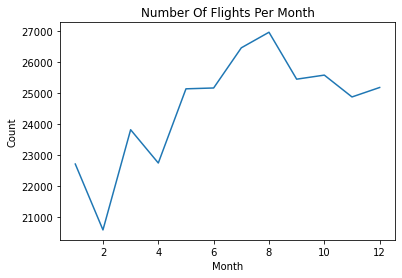

<Figure size 720x288 with 0 Axes>

In [62]:
mn = df_dfw.groupby('MONTH')['DAY_OF_WEEK'].count()
plt.plot(mn)
plt.title('Number Of Flights Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
mn

fig = plt.figure(figsize=(10,4))
plt.show()

##### What can you say about this graph?
From the graph above, we found that in 2019, August was the busiest month (summer holiday). There were around 27000 number of flights.
In contrast, Feb was the least busy month which had less than 21000 number of flights.
淡季因素

### 3.3 How long does it take to travel to DFW by air?

Text(0, 0.5, 'Frequency')

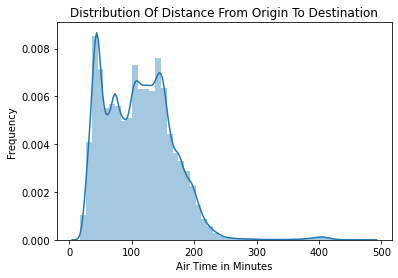

In [63]:
sns.distplot(df_dfw['AIR_TIME'])
plt.title('Distribution Of Distance From Origin To Destination')
plt.xlabel('Air Time in Minutes')
plt.ylabel('Frequency')

##### What can you say about this graph?
We found that the most frequent distance of travel is between 50 to 150 miles. There is much less frequency over 200 miles. We could interpret that people travel to DFW probably prefer to travel somewhere near than far from where they are.
空港到达拉斯的距离与此有关

### 3.4 How does each airlines perform?

[Text(0.5, 0, 'delay_time (arrival: red, departure: blue)'),
 Text(0.5, 1.0, 'Arrival Delay VS Departure Delay')]

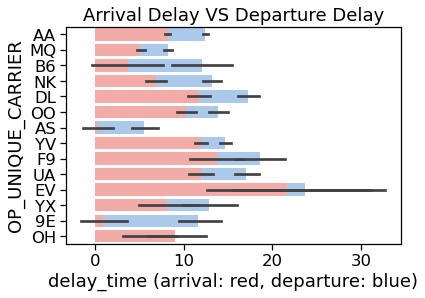

In [64]:
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="DEP_DELAY", y="OP_UNIQUE_CARRIER", data=df_dfw, color="b")
ax = sns.barplot(x="ARR_DELAY", y="OP_UNIQUE_CARRIER", data=df_dfw, color="r")
ax.set(xlabel="delay_time (arrival: red, departure: blue)", title='Arrival Delay VS Departure Delay')

##### What can you say about this graph?
Compare the total delay time, we found that AS（阿拉斯加航空） had the least total delay time and EV（E航站楼） had the most total delay time.
Compare the arrival and departure delay, we found most of the airlines had longer arrival delay than departure delay.
主航站楼优先降落优先起飞（A，B）

### 3.5 Does DFW do better than others on the arrival delays than other airports?

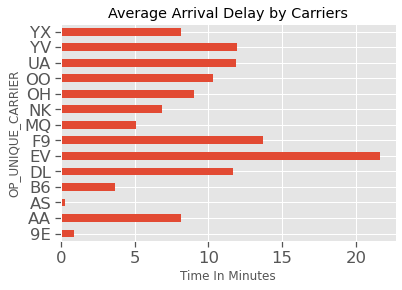

In [65]:
plt.style.use('ggplot')

df_grouped = df_dfw.groupby(by = ['OP_UNIQUE_CARRIER'])
delay_rate = df_grouped.ARR_DELAY.sum() / df_grouped.ARR_DELAY.count()
ax = delay_rate.plot(kind='barh')
plt.title('Average Arrival Delay by Carriers')
plt.xlabel('Time In Minutes')
plt.show()

##### What can you say about this graph?
We could found that AS had the least average arrival delay and EV had the most average arrival delay. This interpretation matches the result of the last one.

### 3.6 How about operating speed?

[Text(0, 0.5, 'Speed in Miles/HR'),
 Text(0.5, 1.0, 'Violin Plot Of the Speed of each Carrier')]

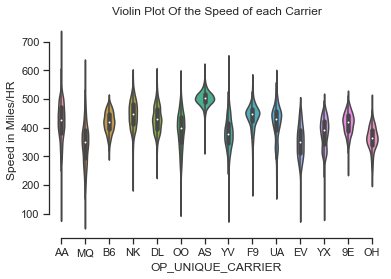

In [66]:
df_dfw['speed'] = 60 * df_dfw['DISTANCE'] / df_dfw['AIR_TIME']
sns.set_context("notebook", font_scale=4)
sns.set(style = "ticks", palette = "muted", color_codes = True)
ax = sns.violinplot(y = "speed", x = "OP_UNIQUE_CARRIER", data = df_dfw);
sns.despine(trim = True)
ax.set(ylabel = 'Speed in Miles/HR',
       title = 'Violin Plot Of the Speed of each Carrier')

##### What can you say about this graph?
阿拉斯加主空港在西雅图 平均distance越长越快

### 3.7 Correlations using heatmap

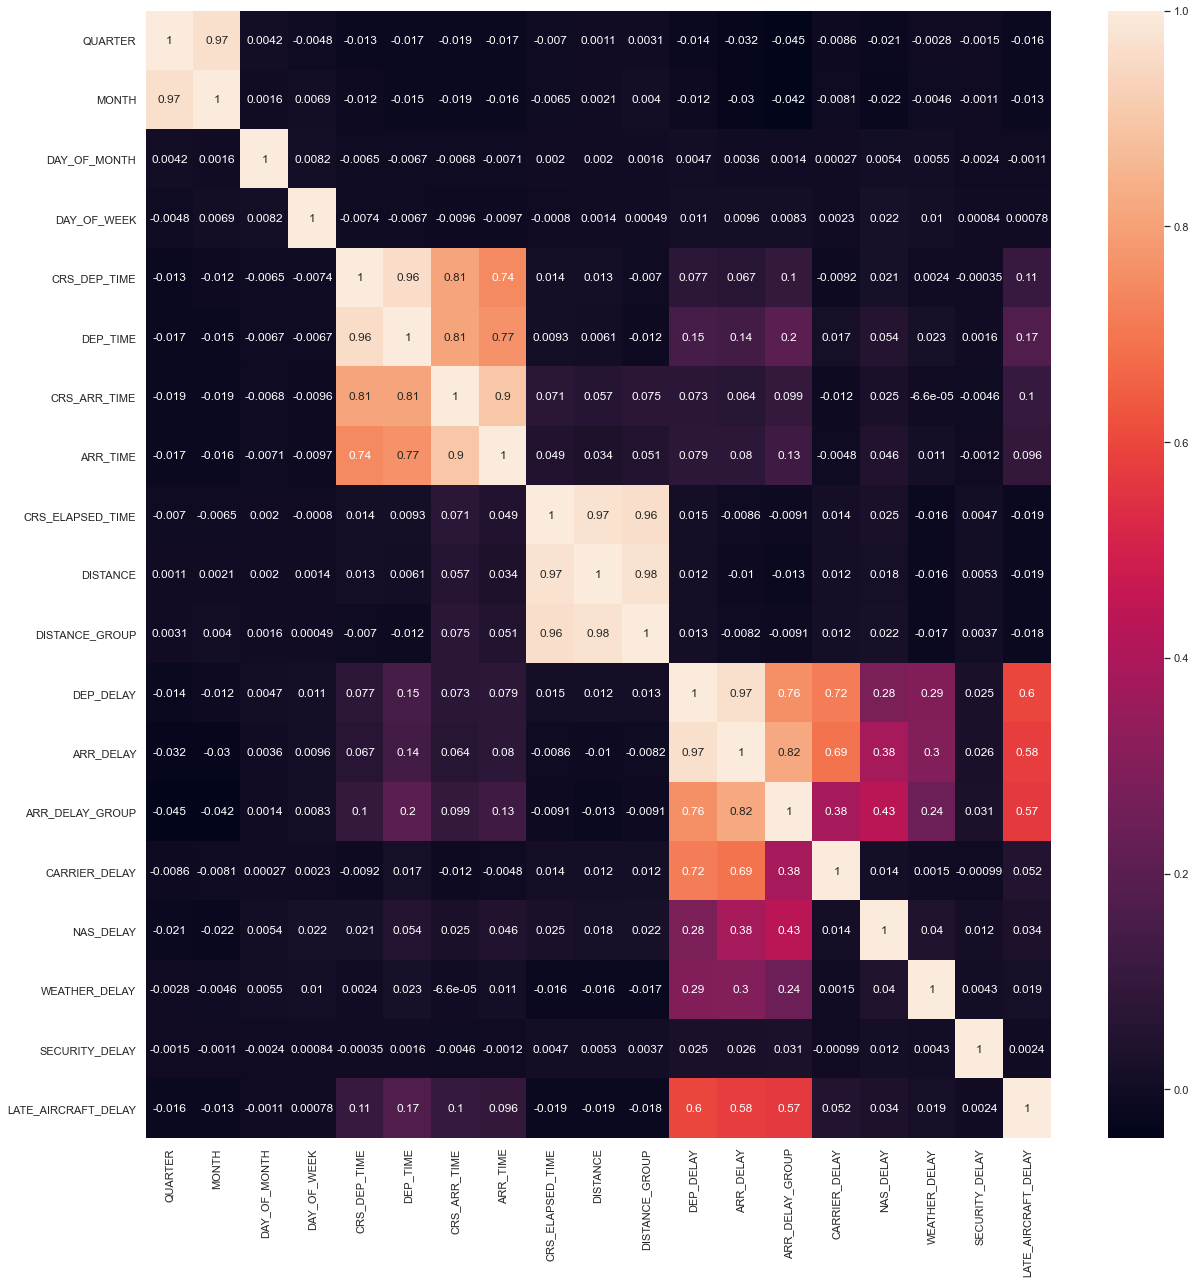

In [67]:
# plot the correlation matrix using seaborn
cmap = sns.set(style = "darkgrid") 

vars_to_use = ['QUARTER',
               'MONTH',
               'DAY_OF_MONTH',
               'DAY_OF_WEEK',
               'OP_UNIQUE_CARRIER',
               'ORIGIN',
               'DEST',
               'CRS_DEP_TIME',
               'DEP_TIME',
               'CRS_ARR_TIME',
               'ARR_TIME',
               'CRS_ELAPSED_TIME',
               'DISTANCE', 
               'DISTANCE_GROUP', 
               'DEP_DELAY', 
               'ARR_DELAY', 
               'ARR_DELAY_GROUP',
               'CARRIER_DELAY', 
               'NAS_DELAY',
               'WEATHER_DELAY', 
               'SECURITY_DELAY', 
               'LATE_AIRCRAFT_DELAY']

f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(df_dfw[vars_to_use].corr(), cmap=cmap, annot=True)

f.tight_layout()

##### What can you say about this graph?
We could see that departure delay and arrival delay are strongly positively correlated.
Both of delay are positively correlated with carrier delay and late aircraft delay.

### 3.7 What are the reason for delay?

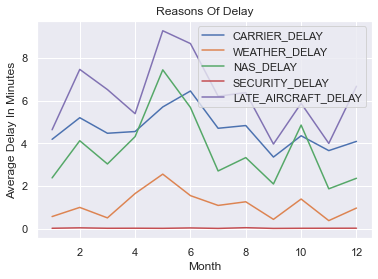

In [68]:
delay_reason = df_dfw.groupby('MONTH')[['CARRIER_DELAY', 
                                        'WEATHER_DELAY', 
                                        'NAS_DELAY', 
                                        'SECURITY_DELAY', 
                                        'LATE_AIRCRAFT_DELAY']].mean()
plt.plot(delay_reason)
plt.title('Reasons Of Delay')
plt.xlabel('Month')
plt.ylabel('Average Delay In Minutes')
plt.legend(delay_reason)
plt.show()

# 4. Feature Engineering - What quantitative features affect the delay?

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

There are multiple quantitative features as we have seen in Section 2 during data cleaning process, Multivariate/multiple linear regression is one an extremely useful algorithm for tracking the relationships of continuous variables. It is also one of the most commonly used algorithms in machine learning. Thus, using this method should serve our purpose as a good starting point.

Note: A common mistake which is always made by people is picking existing information to predict the observed outcome. For this subject, we should ONLY use those information that is available to customers before departure. Therefore, only the following features are considered for later modeling.

* 'YEAR' (Note: This is data only contains 2019, so not considered for any model for this project)
* 'QUARTER'
* 'MONTH'
* 'DAY OF MONTH'
* 'DAY OF WEEK'
* 'OP_CARRIER'           
* 'ORIGIN'          
* 'DEST'
* 'CRS_DEP_TIME' (Note: Range from 0 to 2359 with gaps between 60 and 99 for each one-hundred range)
* 'CRE_ARR_TIME' (Note: Range from 0 to 2359 with gaps between 60 and 99 for each one-hundred range)
* 'CRS_ELAPSED_TIME'
* 'DISTANCE'
* 'DISTANCE_GROUP'

In [69]:
feature_linear = ['QUARTER', 
                  'MONTH', 
                  'DAY_OF_MONTH', 
                  'DAY_OF_WEEK', 
                  'CRS_DEP_TIME', 
                  'CRS_ARR_TIME', 
                  'CRS_ELAPSED_TIME', 
                  'DISTANCE']

feature_logistic = ['QUARTER',
                    'MONTH',
                    'DAY_OF_MONTH',
                    'DAY_OF_WEEK',
                    'OP_UNIQUE_CARRIER',
                    'ORIGIN',
                    'DEST',
                    'CRS_DEP_TIME',
                    'CRS_ARR_TIME',
                    'CRS_ELAPSED_TIME',
                    'DISTANCE',
                    'DISTANCE_GROUP']

print("Possible targets for analytics:", 
      '\nARR_DELAY',
      '\nARR_DELAY_NEW',
      '\nARR_DEL15',
      '\nARR_DELAY_GROUP',
      '\nCARRIER_DELAY',
      '\nWEATHER_DELAY',
      '\nNAS_DELAY',
      '\nSECURITY_DELAY',
      '\nLATE_AIRCRAFT_DELAY',
      '\nDepending on the purpose, any of these could be reasonably used as the dependent variable')

Possible targets for analytics: 
ARR_DELAY 
ARR_DELAY_NEW 
ARR_DEL15 
ARR_DELAY_GROUP 
CARRIER_DELAY 
WEATHER_DELAY 
NAS_DELAY 
SECURITY_DELAY 
LATE_AIRCRAFT_DELAY 
Depending on the purpose, any of these could be reasonably used as the dependent variable


In [70]:
# Name a new variable X as the dataset of features selected for logistic models
X = df_dfw[feature_logistic]
X

QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN  \
304           1      1             1            2                AA    CLT   
305           1      1             2            3                AA    CLT   
306           1      1             3            4                AA    CLT   
307           1      1             4            5                AA    CLT   
308           1      1             5            6                AA    CLT   
...         ...    ...           ...          ...               ...    ...   
622700        4     12            18            3                B6    BOS   
623061        4     12            18            3                B6    BOS   
623517        4     12            19            4                B6    BOS   
623892        4     12            19            4                B6    BOS   
625021        4     12            30            1                B6    BOS   

       DEST  CRS_DEP_TIME  CRS_ARR_TIME  CRS_ELAPSED_TIME  DISTANCE  \
304     DFW            11            14             185.0     936.0   
305     DFW            11            14             185.0     936.0   
306     DFW            11            14             185.0     936.0   
307     DFW            11            14             185.0     936.0   
308     DFW            11            14             185.0     936.0   
...     ...           ...           ...               ...       ...   
622700  DFW             7            10             277.0    1562.0   
623061  DFW            14            18             275.0    1562.0   
623517  DFW             7            10             282.0    1562.0   
623892  DFW            14            18             283.0    1562.0   
625021  DFW            14            18             283.0    1562.0   

        DISTANCE_GROUP  
304                  4  
305                  4  
306                  4  
307                  4  
308                  4  
...                ...  
622700               7  
623061               7  
623517               7  
623892               7  
625021               7  

[294798 rows x 12 columns]

In [71]:
# Use LabelEncoder to apply OneHot Encoding to non-numerical values from X
label_encoder = LabelEncoder()
X.OP_UNIQUE_CARRIER = label_encoder.fit_transform(X.OP_UNIQUE_CARRIER)
X.ORIGIN = label_encoder.fit_transform(X.ORIGIN)
X.DEST = label_encoder.fit_transform(X.DEST)

# Display the Encoded X
X

QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN  \
304           1      1             1            2                  1      34   
305           1      1             2            3                  1      34   
306           1      1             3            4                  1      34   
307           1      1             4            5                  1      34   
308           1      1             5            6                  1      34   
...         ...    ...           ...          ...                ...     ...   
622700        4     12            18            3                  3      20   
623061        4     12            18            3                  3      20   
623517        4     12            19            4                  3      20   
623892        4     12            19            4                  3      20   
625021        4     12            30            1                  3      20   

        DEST  CRS_DEP_TIME  CRS_ARR_TIME  CRS_ELAPSED_TIME  DISTANCE  \
304        0            11            14             185.0     936.0   
305        0            11            14             185.0     936.0   
306        0            11            14             185.0     936.0   
307        0            11            14             185.0     936.0   
308        0            11            14             185.0     936.0   
...      ...           ...           ...               ...       ...   
622700     0             7            10             277.0    1562.0   
623061     0            14            18             275.0    1562.0   
623517     0             7            10             282.0    1562.0   
623892     0            14            18             283.0    1562.0   
625021     0            14            18             283.0    1562.0   

        DISTANCE_GROUP  
304                  4  
305                  4  
306                  4  
307                  4  
308                  4  
...                ...  
622700               7  
623061               7  
623517               7  
623892               7  
625021               7  

[294798 rows x 12 columns]

In [72]:
X.OP_UNIQUE_CARRIER.unique()

array([ 1,  7,  3,  8,  4, 10,  2, 12,  6, 11,  5, 13,  0,  9])

In [73]:
X.shape

(294798, 12)


Q1: variables 选取是否正确

In [74]:
# Declare the dependent and independent variables for linear models
x_linear = df_dfw[feature_linear].values
y_linear = df_dfw.ARR_DELAY.values

# Declare the dependent and independent variables for logistic models
x_log = X.values
y_log = df_dfw.ARR_DELAY_GROUP.values
#y_log.head()

In [75]:
y_log

array([-1.,  0.,  2., ..., -2., -1., -1.])

In [76]:
df_dfw.ARR_DELAY_GROUP.values.shape

(294798,)

In [77]:
df_dfw[['ARR_DELAY_GROUP']].values.shape

(294798, 1)

### 4.2 Downsampling - Dealing with Imbalanced Data

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

| Degree of imbalance | Proportion of Minority Class |
| ------------------- | ---------------------------- |
| Mild	              | 20-40% of the data set       |
| Moderate	          | 1-20% of the data set        |
| Extreme	          | <1% of the data set          |

Why look out for imbalanced data? You may need to apply a particular sampling technique if you have a classification task with an imbalanced data set.

For more information, you may find at the following address or on Google search by yourself
https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [78]:
# Downsampling for popular outcomes
i_class_neg2 = np.where(y_log == -2)[0]
i_class_neg1 = np.where(y_log == -1)[0]
i_class_0 = np.where(y_log == 0)[0]
i_class_1 = np.where(y_log == 1)[0]
i_class_2 = np.where(y_log == 2)[0]
i_class_3 = np.where(y_log == 3)[0]
i_class_4 = np.where(y_log == 4)[0]
i_class_5 = np.where(y_log == 5)[0]
i_class_6 = np.where(y_log == 6)[0]
i_class_7 = np.where(y_log == 7)[0]
i_class_8 = np.where(y_log == 8)[0]
i_class_9 = np.where(y_log == 9)[0]
i_class_10 = np.where(y_log == 10)[0]
i_class_11 = np.where(y_log == 11)[0]
i_class_12 = np.where(y_log == 12)[0]

print('The number of instances arriving 16 - 30 min early is {}.'.format(len(i_class_neg2)))
print('The number of instances arriving 01 - 15 min early is {}.'.format(len(i_class_neg1)))
print('The number of instances arriving 00 - 15 min on-time is {}.'.format(len(i_class_0)))
print('The number of instances arriving 16 - 30 min later is {}.'.format(len(i_class_1)))
print('The number of instances arriving 31 - 45 min later is {}.'.format(len(i_class_2)))
print('The number of instances arriving 46 - 60 min later is {}.'.format(len(i_class_3)))
print('The number of instances arriving 61 - 75 min later is {}.'.format(len(i_class_4)))
print('The number of instances arriving 76 - 90 min later is {}.'.format(len(i_class_5)))
print('The number of instances arriving 91 - 105 min later is {}.'.format(len(i_class_6)))
print('The number of instances arriving 106 - 120 min later is {}.'.format(len(i_class_7)))
print('The number of instances arriving 121 - 130 min later is {}.'.format(len(i_class_8)))
print('The number of instances arriving 131 - 145 min later is {}.'.format(len(i_class_9)))
print('The number of instances arriving 146 - 160 min later is {}.'.format(len(i_class_10)))
print('The number of instances arriving 161 - 175 min later is {}.'.format(len(i_class_11)))
print('The number of instances arriving 176 - 180 min later is {}.'.format(len(i_class_12)))

The number of instances arriving 16 - 30 min early is 68710.
The number of instances arriving 01 - 15 min early is 112828.
The number of instances arriving 00 - 15 min on-time is 53003.
The number of instances arriving 16 - 30 min later is 20991.
The number of instances arriving 31 - 45 min later is 10458.
The number of instances arriving 46 - 60 min later is 6460.
The number of instances arriving 61 - 75 min later is 4520.
The number of instances arriving 76 - 90 min later is 3295.
The number of instances arriving 91 - 105 min later is 2561.
The number of instances arriving 106 - 120 min later is 2026.
The number of instances arriving 121 - 130 min later is 1660.
The number of instances arriving 131 - 145 min later is 1326.
The number of instances arriving 146 - 160 min later is 1109.
The number of instances arriving 161 - 175 min later is 848.
The number of instances arriving 176 - 180 min later is 5003.


In [79]:
# Downsample the most popular classes to a median number such as 4000
i_class_neg2_downsampled = np.random.choice(i_class_neg2, size=4000, replace=False)
i_class_neg1_downsampled = np.random.choice(i_class_neg1, size=4000, replace=False)
i_class_0_downsampled = np.random.choice(i_class_0, size=4000, replace=False)
i_class_1_downsampled = np.random.choice(i_class_1, size=4000, replace=False)
i_class_2_downsampled = np.random.choice(i_class_2, size=4000, replace=False)
# 接着往下写 可能出错 (<4000 replace=True, >=4000 replace=False)
# i_class_3_downsampled = np.random.choice(i_class_3, size=4000, replace=False)
# i_class_4_downsampled = np.random.choice(i_class_4, size=4000, replace=False)
# i_class_5_downsampled = np.random.choice(i_class_5, size=4000, replace=True)
# i_class_6_downsampled = np.random.choice(i_class_6, size=4000, replace=True)
# i_class_7_downsampled = np.random.choice(i_class_7, size=4000, replace=True)
# i_class_8_downsampled = np.random.choice(i_class_8, size=4000, replace=True)
# i_class_9_downsampled = np.random.choice(i_class_9, size=4000, replace=True)
# i_class_10_downsampled = np.random.choice(i_class_10, size=4000, replace=True)
# i_class_11_downsampled = np.random.choice(i_class_11, size=4000, replace=True)
# i_class_12_downsampled = np.random.choice(i_class_12, size=4000, replace=False)

In [80]:
# Create a new x and y data with downsampled classes for logistic regression
# 60000*207
x_downsampled = np.concatenate((x_log[i_class_neg2_downsampled], x_log[i_class_neg1_downsampled], 
                                x_log[i_class_0_downsampled], x_log[i_class_1_downsampled],
                                x_log[i_class_2_downsampled], x_log[i_class_3],
                                x_log[i_class_4], x_log[i_class_5],
                                x_log[i_class_6], x_log[i_class_7],
                                x_log[i_class_8], x_log[i_class_9],
                                x_log[i_class_10], x_log[i_class_11], 
                                x_log[i_class_12]
                               ))
# 4000*15?
# why hstack
y_downsampled = np.hstack((y_log[i_class_neg2_downsampled], 
                           y_log[i_class_neg1_downsampled], 
                           y_log[i_class_0_downsampled], 
                           y_log[i_class_1_downsampled],
                           y_log[i_class_2_downsampled], 
                           y_log[i_class_3],
                           y_log[i_class_4], 
                           y_log[i_class_5],
                           y_log[i_class_6], 
                           y_log[i_class_7],
                           y_log[i_class_8], 
                           y_log[i_class_9],
                           y_log[i_class_10], 
                           y_log[i_class_11], 
                           y_log[i_class_12]
                          ))

In [81]:
len(x_downsampled)

48808

In [82]:
len(y_downsampled)

48808

# 5. Test - Train Data Split

Train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [83]:
# Data preprocesssing dropping na and splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x_linear,
                                                    y_linear,
                                                    train_size = 0.8, 
                                                    random_state = 999)

In [84]:
# print(X_train, "\n")
print(X_train.shape, "\n")
# print(y_train, "\n")
print(y_train.shape, "\n")
# print(X_test, "\n")
print(X_test.shape, "\n")
# print(y_test, "\n")
print(y_test.shape, "\n")

(235838, 8) 

(235838,) 

(58960, 8) 

(58960,) 



## 5.1 Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

In [86]:
# Create an instance of the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg = lin_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = lin_reg.predict(X_test)

Now let's check the predictions against the actual values by using the Root Mean Square Error (RMSE) and R-square metrics, two metrics commonly used to evaluate regression tasks

Note:
* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors)
* R-square is a statistic that will give some information about the goodness of fit of a model. In regression, the R-square coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-square of 1 indicates that the regression predictions perfectly fit the data.

In [87]:
# Calculate the RMSE number for this model
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Calculate the R-square score for this model
test_set_r2 = r2_score(y_test, y_pred)

print("The RMSE is", '{:.4}'.format(test_set_rmse))
print("The R-square score is", '{:.4%}'.format(test_set_r2))

The RMSE is 64.12
The R-square score is 0.5207%


In [88]:
test_set_r2

0.005206871294937909

The prediction is looking bad from R-square score. It indicates that a correct prediction of arrival delay can be made 92 times if we would like to try 100 times of prediction. The linear prediction formula is showns below.

In [89]:
# Slopes for each feature
for index in range(len(feature_linear)):
    if index == 0:
        print("ARR_DELAY = ")
    
    print('{0:.6f}'.format(lin_reg.coef_[index]), "*", feature_linear[index], end = ' ')
    
    if index < len(feature_linear) - 1:
        print("+", end = ' ')
    else:
        print('{0:.6f}'.format(lin_reg.intercept_))

ARR_DELAY = 
-2.980748 * QUARTER + 0.405892 * MONTH + 0.028755 * DAY_OF_MONTH + 0.303346 * DAY_OF_WEEK + 0.564406 * CRS_DEP_TIME + 0.377514 * CRS_ARR_TIME + 0.015279 * CRS_ELAPSED_TIME + -0.003862 * DISTANCE 0.473475


For instance, my next trip is on the day of Christmas, departing at 0941 hours, the designated arrival time is 1357 hours. This trip is 4h 16 min (256 min) and 2,300.6 miles according to the airlines.

ARR_DELAY = -2.980748 * QUARTER + 0.405892 * MONTH + 0.028755 * DAY_OF_MONTH + 0.303346 * DAY_OF_WEEK + 0.564406 * CRS_DEP_TIME + 0.377514 * CRS_ARR_TIME + 0.015279 * CRS_ELAPSED_TIME + -0.003862 * DISTANCE 0.473475
#### 请自行补全该处算式以及下面空格！


This implies that I am expected to arrive (     ) mins late for my flight. Otherwise, we can calculate the prediction using the function below.

In [90]:
# Use predict function for the new observation above
lin_reg.predict(np.array([[4, 12, 25, 3, 941, 1357, 256, 2300.6]]))

array([1033.46784002])

## 5.2 Ordinary Least Square Model

In [91]:
# create a fitted model
OLS_mod = smf.ols(formula = 'ARR_DELAY ~ QUARTER + MONTH + DAY_OF_MONTH + DAY_OF_WEEK + CRS_DEP_TIME + CRS_ARR_TIME + CRS_ELAPSED_TIME', 
                  data = df_dfw).fit()

In [92]:
# print the coefficients
OLS_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ARR_DELAY   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 17 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:38:46   Log-Likelihood:            -1.6350e+06
No. Observations:              294798   AIC:                         3.270e+06
Df Residuals:                  294790   BIC:                         3.270e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4501      0.617      2.352      0.019       0.242       2.659
QUARTER             -2.8387      0.431     -6.593      0.000      -3.683      -1.995
MONTH                0.3606      0.140      2.579      0.010       0.087       0.635
DAY_OF_MONTH         0.0298      0.013      2.289      0.022       0.004       0.055
DAY_OF_WEEK          0.3029      0.057      5.297      0.000       0.191       0.415
CRS_DEP_TIME         0.5711      0.041     13.851      0.000       0.490       0.652
CRS_ARR_TIME         0.3703      0.040      9.190      0.000       0.291       0.449
CRS_ELAPSED_TIME    -0.0126      0.002     -6.219      0.000      -0.017      -0.009
==============================================================================
Omnibus:                   454774.605   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        319019845.415
Skew:                           9.724   Prob(JB):                         0.00
Kurtosis:                     162.980   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q: R-squared value of 0.919?
Q: The coefficients show only DEP_DELAY is highly associated ARR_DELAY (上面没有DEP_DELAY）

* Null Hypothesis: There is no relationship between each feature and ARR_Delay
* Alternative Hypothesis: There is a relationship between each feature and Sales

Since all features have small p-values (< 0.05), reject the null hypothesis for all features. Thus, there is no need to do further about feature selection, since we are taking all features.

The coefficients show only DEP_DELAY is highly associated ARR_DELAY, where as others are either slightly negatively/positively associated with ARR_DELAY.

The Ordinary Least Square model produced a R-squared value of 0.919, which is slightly lower than Linear Regression model. 

#### Plotting the Least Squares Line

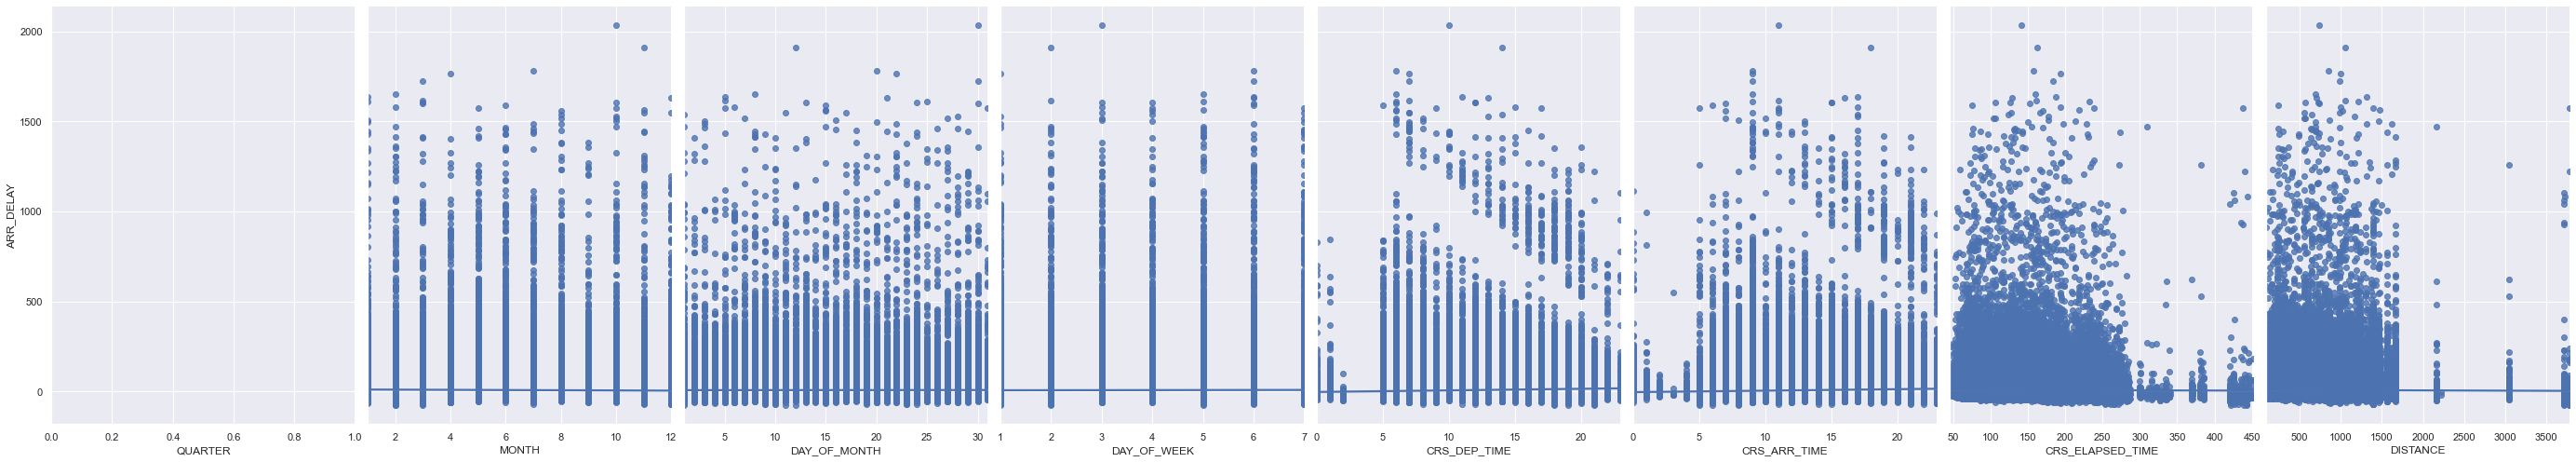

In [93]:
# Use pairplot function from sns to plot the model
sns.pairplot(df_dfw, 
             x_vars = feature_linear, 
             y_vars = 'ARR_DELAY', 
             height = 7, 
             aspect = 0.7, 
             kind = 'reg')

#### 请对线性模型结果做评估
The linear models, linear regression model and ordinary least square model, are not effective models to predict the flight delay. From above, we found that for linear regression model, the R-square score is 0.5207%, which indicates a very bad performance on prediction. Same for ordinary least square model, the R-square score is 0.6%, which is slightly higher than linear regression model but is still a very prediction.
In this way, we need to fit other models to see if they performs a better prediction.

## 5.3  Advanced Models

In [161]:
# Split the dataframe into training and testing sets using downsampled data
X_train, X_test, y_train, y_test = train_test_split(x_downsampled,
                                                    y_downsampled,
                                                    train_size = 0.8, 
                                                    random_state = 999)

### 5.3.1  Logistic Regression

In [95]:
# Create an instance of the model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg = log_reg.fit(X_train, y_train)

# Making predictions on the testing set
log_pred = log_reg.predict(X_test)

#### Accuracy of Logistic Regression

In [96]:
# Use accuracy_score function to get the accuracy of this model
accuracy_score(y_test, log_pred)

0.1352181929932391

#### Summarization of feature importance

In [97]:
importance = log_reg.coef_[0]

importance_score = []
for i,v in enumerate(importance):
    importance_score.append(v)
#     print('Feature: %30s, Score: %.5f' % (features_cleaned[i],v))

importance_table = [feature_logistic, importance_score]
importance_table = pd.DataFrame(data = importance_table).T
importance_table.columns = ["Feature Names", "Importance"]
importance_table = importance_table.sort_values('Importance')
importance_table

Feature Names   Importance
8        CRS_ARR_TIME   -0.0143324
7        CRS_DEP_TIME   -0.0132944
10           DISTANCE -0.000434258
11     DISTANCE_GROUP -0.000374588
6                DEST            0
3         DAY_OF_WEEK  0.000143465
5              ORIGIN  0.000147731
2        DAY_OF_MONTH  0.000369129
4   OP_UNIQUE_CARRIER  0.000808978
0             QUARTER   0.00180411
1               MONTH   0.00547206
9    CRS_ELAPSED_TIME   0.00689331

#### Log Loss of Logistic Regression

In [98]:
# Use log_loss function to get the accuracy of this model
print("The log loss of Logistic Regression prediction is", 
      '{:.2}'.format(log_loss(y_test, log_reg.predict_proba(X_test))))

The log loss of Logistic Regression prediction is 2.6


#### Confusion Matrix on Logistic Regression

In [99]:
# Use crosstab function from pandas to get the confusion matrix of the outcome
pd.crosstab(index    = y_test, 
            columns  = log_pred, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0   3.0  12.0   All
Actual                                 
-2.0         45     3   636   113   797
-1.0         34     3   694   111   842
0.0          36     2   665    71   774
1.0          22     2   722    63   809
2.0          23     1   741    49   814
3.0          27     2  1153    89  1271
4.0          11     1   823    65   900
5.0          10     0   588    50   648
6.0          11     0   500    42   553
7.0           6     0   343    38   387
8.0           3     0   296    38   337
9.0           3     0   232    27   262
10.0          5     0   209    24   238
11.0          4     0   145    13   162
12.0         26     0   823   119   968
All         266    14  8570   912  9762

#### Classification Report on Logistic Regression

In [100]:
# Use classification_report to evaluate the outcome
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

        -2.0       0.17      0.06      0.08       797
        -1.0       0.21      0.00      0.01       842
         0.0       0.00      0.00      0.00       774
         1.0       0.00      0.00      0.00       809
         2.0       0.00      0.00      0.00       814
         3.0       0.13      0.91      0.23      1271
         4.0       0.00      0.00      0.00       900
         5.0       0.00      0.00      0.00       648
         6.0       0.00      0.00      0.00       553
         7.0       0.00      0.00      0.00       387
         8.0       0.00      0.00      0.00       337
         9.0       0.00      0.00      0.00       262
        10.0       0.00      0.00      0.00       238
        11.0       0.00      0.00      0.00       162
        12.0       0.13      0.12      0.13       968

    accuracy                           0.14      9762
   macro avg       0.04      0.07      0.03      9762
weighted avg       0.06   

### 5.3.2 Grid search Cross Validation to select best params
#### 5.3.2.1 Logistic (Lasso) Regression with Cross Validation

In [101]:
%%time

cvalues = [float(x) for x in [1, 0.1, 0.01, 0.001]]
lr1CV = LogisticRegressionCV(Cs=cvalues, penalty='l1', solver='saga').fit(X_train, y_train)
lr1CV_predictions = lr1CV.predict(X_test)

CPU times: user 58.9 s, sys: 5.8 s, total: 1min 4s
Wall time: 58.1 s


#### Accuracy of Logistic (Lasso) Regression with Cross Validation

In [102]:
print("The accuracy of Logistic Regression L1 CV prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, lr1CV_predictions)))
print("The best Lambda for each class is", lr1CV.C_)

The accuracy of Logistic Regression L1 CV prediction is 13.69%
The best Lambda for each class is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Summarization of feature importance

In [103]:
importance = lr1CV.coef_[0]

importance_score = []
for i,v in enumerate(importance):
    importance_score.append(v)
#     print('Feature: %30s, Score: %.5f' % (features_cleaned[i],v))

importance_table = [feature_logistic, importance_score]
importance_table = pd.DataFrame(data = importance_table).T
importance_table.columns = ["Feature Names", "Importance"]
importance_table = importance_table.sort_values('Importance')
importance_table

Feature Names   Importance
8        CRS_ARR_TIME   -0.0305567
7        CRS_DEP_TIME   -0.0259485
11     DISTANCE_GROUP  -0.00264275
10           DISTANCE -0.000463994
6                DEST            0
5              ORIGIN   0.00119797
2        DAY_OF_MONTH   0.00148894
3         DAY_OF_WEEK   0.00242849
4   OP_UNIQUE_CARRIER   0.00665947
9    CRS_ELAPSED_TIME    0.0075639
0             QUARTER   0.00883926
1               MONTH     0.026016

#### Log Loss of Logistic Regression

In [104]:
print("The log loss of Logistic Regression L1 CV prediction is", 
      '{:.2}'.format(log_loss(y_test, lr1CV.predict_proba(X_test))))

The log loss of Logistic Regression L1 CV prediction is 2.6


#### Confusion Matrix on Logistic (Lasso) Regression with Cross Validation

In [105]:
pd.crosstab(index    = y_test, 
            columns  = lr1CV_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0   3.0  12.0   All
Actual                                 
-2.0        141    39   527    90   797
-1.0        107    45   585   105   842
0.0         125    24   557    68   774
1.0          78    21   649    61   809
2.0          76    17   670    51   814
3.0          96    30  1047    98  1271
4.0          67    18   752    63   900
5.0          43    12   534    59   648
6.0          35     7   459    52   553
7.0          28    12   310    37   387
8.0          20    13   262    42   337
9.0          17     6   204    35   262
10.0         23     9   180    26   238
11.0         12     3   135    12   162
12.0        104    38   723   103   968
All         972   294  7594   902  9762

#### Classification Report on Logistic (Lasso) Regression with Cross Validation

In [106]:
print(classification_report(y_test, lr1CV_predictions))

              precision    recall  f1-score   support

        -2.0       0.15      0.18      0.16       797
        -1.0       0.15      0.05      0.08       842
         0.0       0.00      0.00      0.00       774
         1.0       0.00      0.00      0.00       809
         2.0       0.00      0.00      0.00       814
         3.0       0.14      0.82      0.24      1271
         4.0       0.00      0.00      0.00       900
         5.0       0.00      0.00      0.00       648
         6.0       0.00      0.00      0.00       553
         7.0       0.00      0.00      0.00       387
         8.0       0.00      0.00      0.00       337
         9.0       0.00      0.00      0.00       262
        10.0       0.00      0.00      0.00       238
        11.0       0.00      0.00      0.00       162
        12.0       0.11      0.11      0.11       968

    accuracy                           0.14      9762
   macro avg       0.04      0.08      0.04      9762
weighted avg       0.05   

#### 5.3.2.2 Logistic (Ridge) Regression with Cross Validation

In [107]:
%%time

cvalues = [float(x) for x in [1, 0.1, 0.01, 0.001]]
lr2CV = LogisticRegressionCV(Cs=cvalues, penalty='l2', solver='lbfgs').fit(X_train, y_train)
lr2CV_predictions = lr2CV.predict(X_test)

CPU times: user 52.6 s, sys: 1min 58s, total: 2min 51s
Wall time: 26.1 s


#### Accuracy of Logistic (Ridge) Regression with Cross Validation

In [108]:
print("The accuracy of Logistic Regression L2 CV prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, lr2CV_predictions)))
print("The best Lambda for each class is", lr2CV.C_)

The accuracy of Logistic Regression L2 CV prediction is 13.71%
The best Lambda for each class is [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


#### Summarization of feature importance

In [109]:
importance = lr2CV.coef_[0]

importance_score = []
for i,v in enumerate(importance):
    importance_score.append(v)
#     print('Feature: %30s, Score: %.5f' % (features_cleaned[i],v))

importance_table = [feature_logistic, importance_score]
importance_table = pd.DataFrame(data = importance_table).T
importance_table.columns = ["Feature Names", "Importance"]
importance_table = importance_table.sort_values('Importance')
importance_table

Feature Names   Importance
8        CRS_ARR_TIME   -0.0308123
7        CRS_DEP_TIME   -0.0264931
11     DISTANCE_GROUP  -0.00216672
10           DISTANCE -0.000521721
6                DEST            0
5              ORIGIN   0.00113064
3         DAY_OF_WEEK   0.00211592
2        DAY_OF_MONTH   0.00214982
4   OP_UNIQUE_CARRIER   0.00676924
9    CRS_ELAPSED_TIME   0.00800299
0             QUARTER   0.00827178
1               MONTH    0.0244627

#### Log Loss of Logistic Regression

In [110]:
print("The log loss of Logistic Regression L2 CV prediction is", 
      '{:.2}'.format(log_loss(y_test, lr2CV.predict_proba(X_test))))

The log loss of Logistic Regression L2 CV prediction is 2.6


#### Confusion Matrix on Logistic (Ridge) Regression with Cross Validation

In [111]:
pd.crosstab(index    = y_test, 
            columns  = lr2CV_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0   3.0  12.0   All
Actual                                 
-2.0        140    31   513   113   797
-1.0        107    35   572   128   842
0.0         127    23   541    83   774
1.0          77    19   636    77   809
2.0          75    14   656    69   814
3.0          97    26  1031   117  1271
4.0          65    14   742    79   900
5.0          47    10   523    68   648
6.0          35     7   449    62   553
7.0          28    11   309    39   387
8.0          20    12   259    46   337
9.0          18     3   200    41   262
10.0         21     4   177    36   238
11.0         13     2   132    15   162
12.0         99    32   705   132   968
All         969   243  7445  1105  9762

#### Classification Report on Logistic (Ridge) Regression with Cross Validation

In [112]:
print(classification_report(y_test, lr2CV_predictions))

              precision    recall  f1-score   support

        -2.0       0.14      0.18      0.16       797
        -1.0       0.14      0.04      0.06       842
         0.0       0.00      0.00      0.00       774
         1.0       0.00      0.00      0.00       809
         2.0       0.00      0.00      0.00       814
         3.0       0.14      0.81      0.24      1271
         4.0       0.00      0.00      0.00       900
         5.0       0.00      0.00      0.00       648
         6.0       0.00      0.00      0.00       553
         7.0       0.00      0.00      0.00       387
         8.0       0.00      0.00      0.00       337
         9.0       0.00      0.00      0.00       262
        10.0       0.00      0.00      0.00       238
        11.0       0.00      0.00      0.00       162
        12.0       0.12      0.14      0.13       968

    accuracy                           0.14      9762
   macro avg       0.04      0.08      0.04      9762
weighted avg       0.05   

### 5.3.3 Supervised Learning - Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
## 调参 使用GridSearchCV，score依旧很低该怎么办
param = {'splitter':['best', 'random'],'max_depth':[x for x in range(5,15,2)],'min_samples_split':[x for x in range(100,200,20)],
        'random_state':[x for x in range(1,20,1)], 'min_impurity_decrease':[0.1,0.2,0.3,0.4,0.5]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=6,scoring="f1_weighted")
grid.fit(X_train, y_train)
print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)


最优分类器: {'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_split': 100, 'random_state': 1, 'splitter': 'best'} 最优分数: 0.1328945366607068


In [ ]:
dt_classifier = DecisionTreeClassifier(splitter="random", min_samples_split=100)
dt_classifier = dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

#### Accuracy of Decision Tree

In [160]:
print("The accuracy of Decision Tree prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, dt_predictions)))

The accuracy of Decision Tree prediction is 14.70%


#### Confusion Matrix Decision Tree

In [148]:
pd.crosstab(index    = y_test, 
            columns  = dt_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0  0.0  1.0  2.0   3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
Actual                                                                     
-2.0        113    95   74   63   60    88   68   45   31   21   27   19   
-1.0        101    99   84   73   58    88   68   60   38   26   22   28   
0.0          65    88   87   96   61    95   55   56   34   36   17   17   
1.0          51    69   94   69   75   120   75   47   39   31   30   20   
2.0          47    51   75   83   83   123   83   60   48   27   26   20   
3.0          87    80  101  119  103   208  125   97   70   52   42   38   
4.0          59    55   74   59   78   128  110   72   58   39   38   33   
5.0          43    45   50   43   53    88   75   61   39   34   30   17   
6.0          22    32   35   46   50    84   53   51   36   31   27   22   
7.0          20    28   31   22   35    58   39   18   30   20   15   17   
8.0          14    23   24   21   23    47   20   28   22   20   18   19   
9.0          16    19    7   18   13    41   28   15   10   14   11   13   
10.0          8    13   14   15   17    30   18   22   19   14    9    7   
11.0         12     9    5   18    8    26   10   13   12    6    9    9   
12.0         54    56   64   66   68   102   73   65   49   50   35   23   
All         712   762  819  811  785  1326  900  710  535  421  356  302   

Predicted  10.0  11.0  12.0   All  
Actual                             
-2.0         14    11    68   797  
-1.0         11     8    78   842  
0.0          12     3    52   774  
1.0          12     9    68   809  
2.0          12    13    63   814  
3.0          19    17   113  1271  
4.0          28     5    64   900  
5.0          11    11    48   648  
6.0           9     7    48   553  
7.0          13    10    31   387  
8.0          10    12    36   337  
9.0          12    15    30   262  
10.0          8     4    40   238  
11.0          4     3    18   162  
12.0         21    27   215   968  
All         196   155   972  9762

#### Classification Report on Decision Tree

In [149]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

        -2.0       0.16      0.14      0.15       797
        -1.0       0.13      0.12      0.12       842
         0.0       0.11      0.11      0.11       774
         1.0       0.09      0.09      0.09       809
         2.0       0.11      0.10      0.10       814
         3.0       0.16      0.16      0.16      1271
         4.0       0.12      0.12      0.12       900
         5.0       0.09      0.09      0.09       648
         6.0       0.07      0.07      0.07       553
         7.0       0.05      0.05      0.05       387
         8.0       0.05      0.05      0.05       337
         9.0       0.04      0.05      0.05       262
        10.0       0.04      0.03      0.04       238
        11.0       0.02      0.02      0.02       162
        12.0       0.22      0.22      0.22       968

    accuracy                           0.12      9762
   macro avg       0.10      0.10      0.10      9762
weighted avg       0.12   

### 5.3.4 Supervised Learning - Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
param = { "n_estimators"      : [50,100,200,300],
           "criterion"         : ["gini", "entropy"],
           "max_depth"         : [5, 10, 20],
           "min_samples_split" : [50,100,200,300] ,
           "bootstrap": [True, False]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=param,cv=6)
grid.fit(X_train, y_train)
print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)

最优分类器: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 100} 最优分数: 0.17233514806222427


In [139]:
rf_classifier = RandomForestClassifier(n_estimators=75)
rf_classifier = rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

#### Accuracy of Random Forest

In [140]:
print("The accuracy of Random Forest prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, rf_predictions)))

The accuracy of Random Forest prediction is 13.80%


#### Confusion Matrix Random Forest

In [121]:
pd.crosstab(index    = y_test, 
            columns  = rf_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0  0.0   3.0  4.0  12.0   All
Actual                                           
-2.0        163    30    0   510    0    94   797
-1.0        123    43    1   557    0   118   842
0.0         138    27    3   536    0    70   774
1.0          81    15    2   639    0    72   809
2.0          67    11    0   662    0    74   814
3.0          94    22    1  1051    0   103  1271
4.0          63    18    0   742    0    77   900
5.0          63    14    1   514    0    56   648
6.0          33     9    4   439    0    68   553
7.0          34     9    0   302    0    42   387
8.0          31     5    0   255    0    46   337
9.0          20     6    0   193    0    43   262
10.0         15    13    0   178    1    31   238
11.0         14     4    0   125    0    19   162
12.0         98    21    2   672    0   175   968
All        1037   247   14  7375    1  1088  9762

#### Classification Report on Random Forest

In [122]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

        -2.0       0.16      0.20      0.18       797
        -1.0       0.17      0.05      0.08       842
         0.0       0.21      0.00      0.01       774
         1.0       0.00      0.00      0.00       809
         2.0       0.00      0.00      0.00       814
         3.0       0.14      0.83      0.24      1271
         4.0       0.00      0.00      0.00       900
         5.0       0.00      0.00      0.00       648
         6.0       0.00      0.00      0.00       553
         7.0       0.00      0.00      0.00       387
         8.0       0.00      0.00      0.00       337
         9.0       0.00      0.00      0.00       262
        10.0       0.00      0.00      0.00       238
        11.0       0.00      0.00      0.00       162
        12.0       0.16      0.18      0.17       968

    accuracy                           0.15      9762
   macro avg       0.06      0.08      0.05      9762
weighted avg       0.08   

### 5.3.5 Supervised Learning - Support Vector Machine (SVM)

In [123]:
from sklearn import svm

In [124]:
sv = svm.SVC()
sv = sv.fit(X_train, y_train)
sv_predictions = sv.predict(X_test)

#### Accuracy of SVM

In [125]:
print("The accuracy of SVM prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, sv_predictions)))

The accuracy of SVM prediction is 13.08%


#### Confusion Matrix SVM

In [126]:
pd.crosstab(index    = y_test, 
            columns  = sv_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0   3.0  12.0   All
Actual                           
-2.0          7   789     1   797
-1.0          2   840     0   842
0.0           5   769     0   774
1.0           1   808     0   809
2.0           0   814     0   814
3.0           1  1269     1  1271
4.0           2   898     0   900
5.0           1   647     0   648
6.0           1   552     0   553
7.0           0   387     0   387
8.0           0   335     2   337
9.0           0   262     0   262
10.0          0   237     1   238
11.0          0   162     0   162
12.0          4   963     1   968
All          24  9732     6  9762

#### Classification Report on SVM

In [127]:
print(classification_report(y_test, sv_predictions))

              precision    recall  f1-score   support

        -2.0       0.29      0.01      0.02       797
        -1.0       0.00      0.00      0.00       842
         0.0       0.00      0.00      0.00       774
         1.0       0.00      0.00      0.00       809
         2.0       0.00      0.00      0.00       814
         3.0       0.13      1.00      0.23      1271
         4.0       0.00      0.00      0.00       900
         5.0       0.00      0.00      0.00       648
         6.0       0.00      0.00      0.00       553
         7.0       0.00      0.00      0.00       387
         8.0       0.00      0.00      0.00       337
         9.0       0.00      0.00      0.00       262
        10.0       0.00      0.00      0.00       238
        11.0       0.00      0.00      0.00       162
        12.0       0.17      0.00      0.00       968

    accuracy                           0.13      9762
   macro avg       0.04      0.07      0.02      9762
weighted avg       0.06   

### 5.3.6 Supervised Learning - K-Nearest Neighbor (KNN)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#### Accuracy of KNN

In [130]:
print("The accuracy of KNN prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, knn_predictions)))

The accuracy of KNN prediction is 10.74%


#### Confusion Matrix KNN

In [131]:
pd.crosstab(index    = y_test, 
            columns  = knn_predictions, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted  -2.0  -1.0   0.0  1.0  2.0   3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
Actual                                                                      
-2.0        241   133    66   53   49    99   40   28   16    7    8    6   
-1.0        181   159   103   67   43    86   53   26    9    9   12    6   
0.0         157   122   106   75   57   102   53   14   12    5    7    5   
1.0         149    98   130   90   57   108   53   30   11   18    9    5   
2.0         147    94   108   96   75   130   44   36   10   11    6    3   
3.0         230   180   166  121   97   186   83   49   33   20   15    9   
4.0         174   129   105   77   84   127   44   29   30   18    7    2   
5.0         132   108    67   56   52    81   54   14   19    7    6    0   
6.0         102    60    70   48   41    81   41   31   15    8    9    1   
7.0          65    57    51   39   33    59   12   14   10    7    5    2   
8.0          66    34    31   29   25    57   24   15   11    6    2    1   
9.0          51    36    29   21   14    34   21   11    9    4    5    2   
10.0         51    27    30   21   17    34   17   12    3    2    2    2   
11.0         35    13    16   10   11    32    6   10    6    1    1    4   
12.0        175   143   110   83   82   117   49   42   29   14    8    6   
All        1956  1393  1188  886  737  1333  594  361  223  137  102   54   

Predicted  10.0  11.0  12.0   All  
Actual                             
-2.0          3     3    45   797  
-1.0          3     2    83   842  
0.0           4     4    51   774  
1.0           2     1    48   809  
2.0           2     2    50   814  
3.0           2     1    79  1271  
4.0           5     6    63   900  
5.0           3     2    47   648  
6.0           4     2    40   553  
7.0           2     1    30   387  
8.0           1     1    34   337  
9.0           4     1    20   262  
10.0          2     2    16   238  
11.0          1     0    16   162  
12.0          3     2   105   968  
All          41    30   727  9762

#### Classification Report on KNN

In [132]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

        -2.0       0.12      0.30      0.18       797
        -1.0       0.11      0.19      0.14       842
         0.0       0.09      0.14      0.11       774
         1.0       0.10      0.11      0.11       809
         2.0       0.10      0.09      0.10       814
         3.0       0.14      0.15      0.14      1271
         4.0       0.07      0.05      0.06       900
         5.0       0.04      0.02      0.03       648
         6.0       0.07      0.03      0.04       553
         7.0       0.05      0.02      0.03       387
         8.0       0.02      0.01      0.01       337
         9.0       0.04      0.01      0.01       262
        10.0       0.05      0.01      0.01       238
        11.0       0.00      0.00      0.00       162
        12.0       0.14      0.11      0.12       968

    accuracy                           0.11      9762
   macro avg       0.08      0.08      0.07      9762
weighted avg       0.09   

### Unsupervised Learning - Principle Component Analysis (PCA)

#### Accuracy of PCA

#### Confusion Matrix PCA

#### Classification Report on PCA

# 6. Conclusion & What's More?

We have applied the machine learning workflow and finished a series of modeling job. Every implementation of machine learning algorithms has the same basic components. 
* Understanding the data (Section 1 & 3）
* Preparing/Preproceesing the data (Section 2 & 4)
* Creating/Training/Evaluating the model (Section 5)

There are not covered and could be important in fulture modeling.
* Detecting collinearity
* Diagnosing model fit
* Transforming features to fit non-linear relationships
* Interaction terms
* Assumptions of linear regression

More modeling to be considered.
* Polynomial regression
* Stepwise regression
* ......


# Resources

https://stackabuse.com/multiple-linear-regression-with-python/

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data